# Predict the Star Rating of an Amazon Review from the Compound Score
Train a model that can predict the Star Rating that a customer gave the product based on the compound score of the review

#### What is a compound score?
A customer's review may have a positive, negative, or neutral sentiment. To determine this sentiment, we use the compound score. The range for the compound score is normalised between -1 to 1.

#### Range of compound scores:
Negative <= -0.05
<br> -0.05 < Neutral < 0.05
<br> 0.05 <= Positive

In [12]:
from sklearn.model_selection import train_test_split
import pandas as pd
from read_data import get_output_amazon_data
from read_ml_models import save_model
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

### Retrieve the dataset

In [13]:
amazon_reviews = get_output_amazon_data()

### Train the data on a linear regression model

In [14]:
def linger(Xt,Yt):
    X = np.stack([Xt], axis=1)
    return LinearRegression().fit(X, Yt)

In [15]:
def modeler(X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.35)
    modelkm = linger(X_train, Y_train)
    return modelkm, X_train,Y_train, X_test, Y_test

### Pick the necessary dataset
Use compound score and star rating to create a model that can predict the star rating of a compound score. Normalize star rating by multiplying by compound score so that the range of values is -5 to 5 instead of -1 to 1

In [16]:
Xl = amazon_reviews['review_body_compound_score']*amazon_reviews['star_rating']
Yl = amazon_reviews['review_body_compound_score']

In [17]:
model,Xtrain, Ytrain, Xtest, Ytest = modeler(Xl,Yl)

In [18]:
Xlt = np.stack([Xtest], axis=1)
xtt = Xtest/Ytest

##### High score when predicting a review's star rating

In [19]:
print(model.score(Xlt,Ytest))

0.8534725406514483


In [20]:
ypred = model.predict(Xlt)

### Plot the data and best fit line
Our data has five lines and the best fit line predicts where most of the data ends up

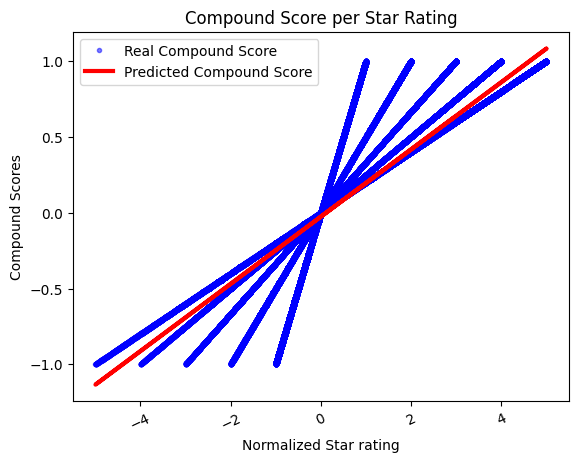

In [21]:
plt.xticks(rotation=25)
plt.plot(Xlt,Ytest, '.b', alpha = 0.5)
plt.plot(Xlt,ypred, 'r-', linewidth = 3 )
plt.legend(["Real Compound Score", "Predicted Compound Score"])
plt.title('Compound Score per Star Rating')
plt.xlabel('Normalized Star rating')
plt.ylabel('Compound Scores')
plt.show()

In [22]:
save_model(model,"star_rating_linregress.joblib.gz")